In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from utils import load_by_metric, load_runtimes

%matplotlib inline
rcParams.update({"legend.fontsize": 14, 
            "legend.loc": "upper right", 
            "figure.titlesize": "xx-large",
            "figure.figsize": (24, 8),
            "axes.titlesize": "x-large",
            "axes.grid": True,
            "grid.linestyle": ":"})

In [2]:
etaV0 = load_by_metric("fedac0.hdf5", "eta")
etaV1 = load_by_metric("fedac1.hdf5", "eta")
etaV2 = load_by_metric("fedac2.hdf5", "eta")

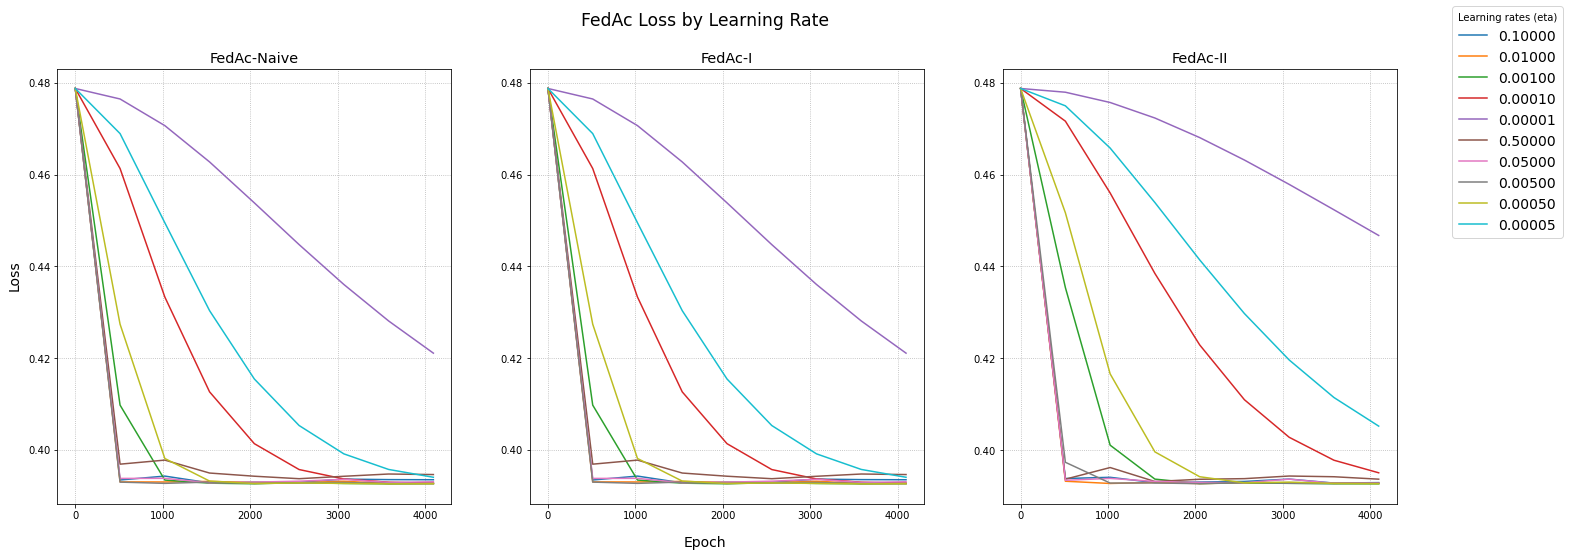

In [3]:
fig, axs = plt.subplots(1, 3)

fig.suptitle("FedAc Loss by Learning Rate")
etaV0.plot(ax = axs[0], title = "FedAc-Naive", legend = False)
etaV1.plot(ax = axs[1], title = "FedAc-I", legend = False)
etaV2.plot(ax = axs[2], title = "FedAc-II", legend = False)

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title = "Learning rates (eta)")

fig.text(0.5, 0.05, "Epoch", ha = "center", fontsize = 14)
fig.text(0.1, 0.5, "Loss", ha = "center", rotation = "vertical", fontsize = 14)

plt.show()

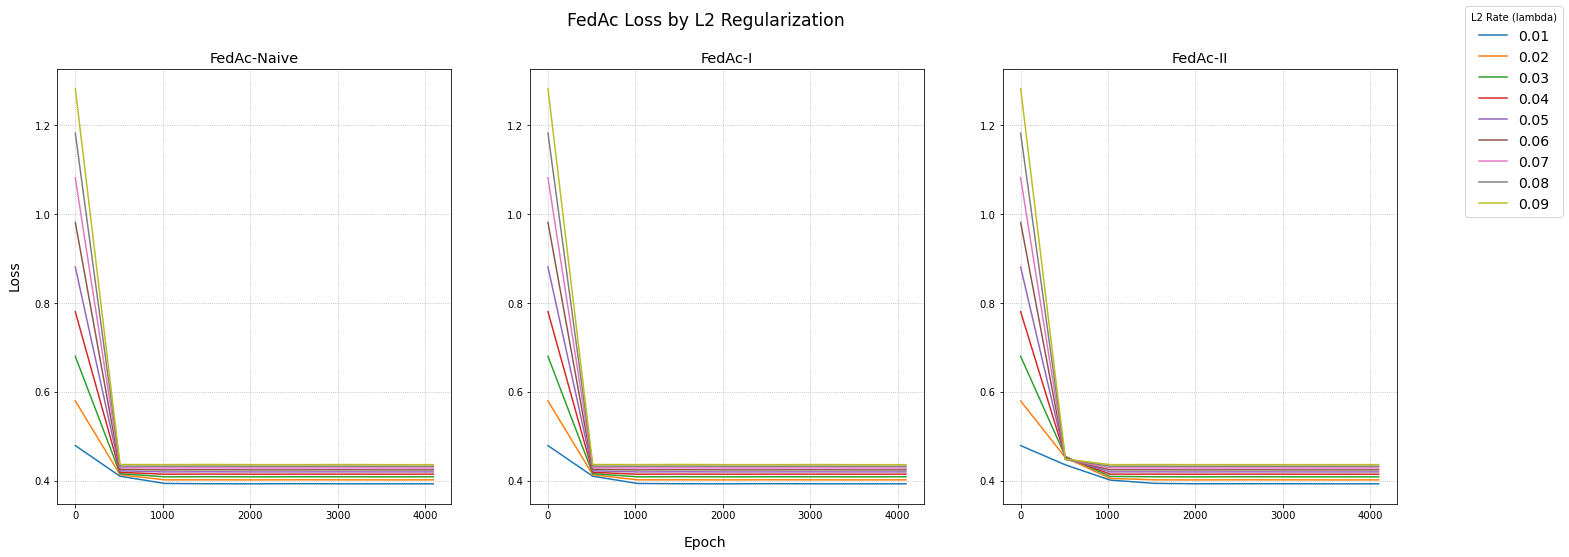

In [4]:
decayV0 = load_by_metric("fedac0.hdf5", "decay")
decayV1 = load_by_metric("fedac1.hdf5", "decay")
decayV2 = load_by_metric("fedac2.hdf5", "decay")

fig, axs = plt.subplots(1, 3)

fig.suptitle("FedAc Loss by L2 Regularization")
decayV0.plot(ax = axs[0], title = "FedAc-Naive", legend = False)
decayV1.plot(ax = axs[1], title = "FedAc-I", legend = False)
decayV2.plot(ax = axs[2], title = "FedAc-II", legend = False)

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title = "L2 Rate (lambda)")

fig.text(0.5, 0.05, "Epoch", ha = "center", fontsize = 14)
fig.text(0.1, 0.5, "Loss", ha = "center", rotation = "vertical", fontsize = 14)

plt.show()

The rates were too low show any significant differences. 

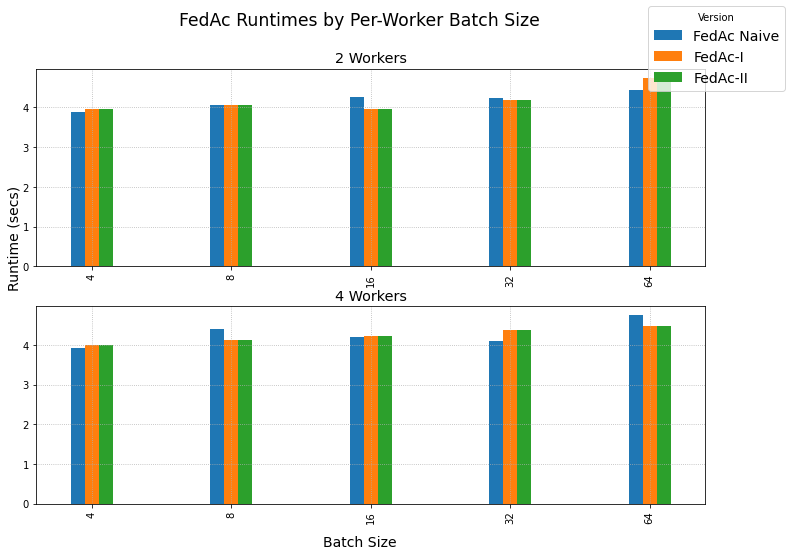

In [24]:
batchM2V0 = load_runtimes("fedac0.hdf5", "M2", "B") 
batchM2V1 = load_runtimes("fedac1.hdf5", "M2", "B") 
batchM2V2 = load_runtimes("fedac1.hdf5", "M2", "B") 

batchM4V0 = load_runtimes("fedac0.hdf5", "M4", "B") 
batchM4V1 = load_runtimes("fedac1.hdf5", "M4", "B") 
batchM4V2 = load_runtimes("fedac1.hdf5", "M4", "B") 

fig, axs = plt.subplots(2, 1, figsize = (12, 8))

df = pd.DataFrame({"FedAc Naive" : batchM2V0, "FedAc-I": batchM2V1, "FedAc-II": batchM2V2})
df2 = pd.DataFrame({"FedAc Naive" : batchM4V0, "FedAc-I": batchM4V1, "FedAc-II": batchM4V2})

fig.suptitle("FedAc Runtimes by Per-Worker Batch Size")
df.plot.bar(ax = axs[0], title = "2 Workers", legend = False, width = .3)
df2.plot.bar(ax = axs[1], title = "4 Workers", legend = False, width = .3)

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title = "Version")

fig.text(0.5, 0.05, "Batch Size", ha = "center", fontsize = 14)
fig.text(0.1, 0.5, "Runtime (secs)", ha = "center", rotation = "vertical", fontsize = 14)

plt.show()

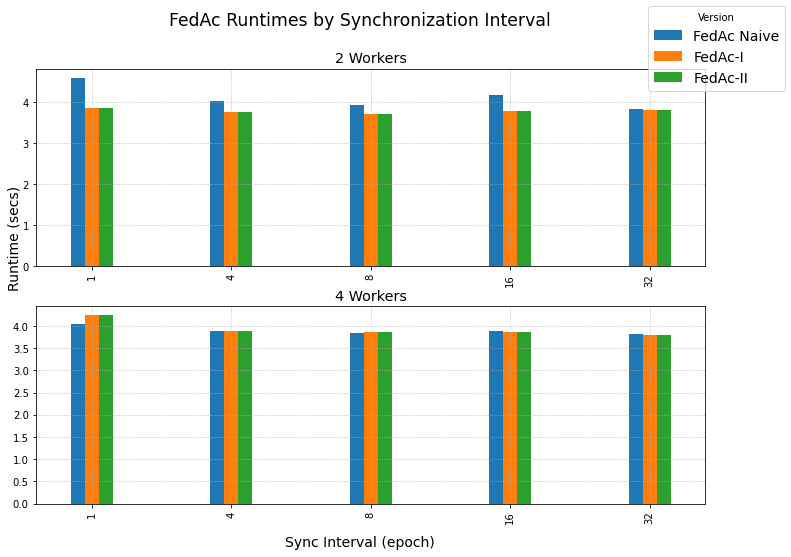

In [21]:
batchM2V0 = load_runtimes("fedac0.hdf5", "M2", "T") 
batchM2V1 = load_runtimes("fedac1.hdf5", "M2", "T") 
batchM2V2 = load_runtimes("fedac1.hdf5", "M2", "T") 

batchM4V0 = load_runtimes("fedac0.hdf5", "M4", "T") 
batchM4V1 = load_runtimes("fedac1.hdf5", "M4", "T") 
batchM4V2 = load_runtimes("fedac1.hdf5", "M4", "T") 

fig, axs = plt.subplots(2, 1, figsize = (12, 8))

df = pd.DataFrame({"FedAc Naive" : batchM2V0, "FedAc-I": batchM2V1, "FedAc-II": batchM2V2})
df2 = pd.DataFrame({"FedAc Naive" : batchM4V0, "FedAc-I": batchM4V1, "FedAc-II": batchM4V2})

fig.suptitle("FedAc Runtimes by Synchronization Interval")
df.plot.bar(ax = axs[0], title = "2 Workers", legend = False, width = 0.3)
df2.plot.bar(ax = axs[1], title = "4 Workers", legend = False, width = 0.3)

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, title = "Version")

fig.text(0.5, 0.05, "Sync Interval (epoch)", ha = "center", fontsize = 14)
fig.text(0.1, 0.5, "Runtime (secs)", ha = "center", rotation = "vertical", fontsize = 14)

plt.show()